En iyi KNN parametreleri: {'n_neighbors': 1}
En iyi SVM parametreleri: {'C': 1, 'kernel': 'poly'}
En iyi Karar Ağacı parametreleri: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 40}
Logistic Regression Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

------------------------------
Optimized Decision Tree Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        

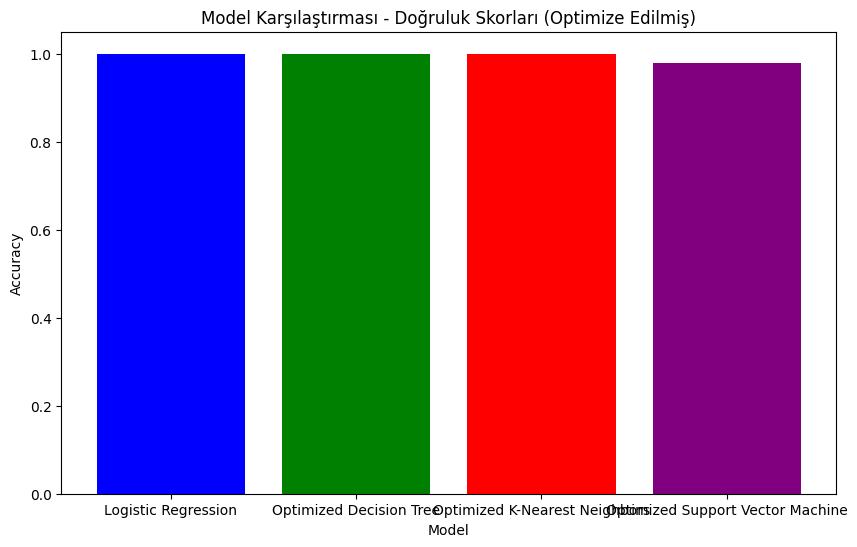

In [4]:
# Gerekli kütüphaneleri yüklüyoruz
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Veri setini yüklüyoruz
data = pd.read_csv('iris.csv')

# Özellikleri (X) ve hedef değişkeni (y) ayırıyoruz
X = data.drop(columns=['species'])  # 'species' sütunu hedef değişkenimiz
y = data['species']

# Veriyi %70 eğitim ve %30 test olarak bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelleri tanımlıyoruz
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

# KNN için GridSearchCV ile en iyi 'n_neighbors' değerini bulma
knn_params = {'n_neighbors': range(1, 31)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
print("En iyi KNN parametreleri:", knn_grid.best_params_)

# SVM için hiperparametre arama
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
print("En iyi SVM parametreleri:", svm_grid.best_params_)

# Karar Ağacı için RandomizedSearchCV ile hiperparametre ayarı
tree_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_random = RandomizedSearchCV(DecisionTreeClassifier(), tree_params, n_iter=10, cv=5, random_state=42)
tree_random.fit(X_train, y_train)
best_tree = tree_random.best_estimator_
print("En iyi Karar Ağacı parametreleri:", tree_random.best_params_)

# Modelleri en iyi parametrelerle güncelleyerek sonuçları saklamak için bir sözlük oluşturuyoruz
optimized_models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Optimized Decision Tree": best_tree,
    "Optimized K-Nearest Neighbors": best_knn,
    "Optimized Support Vector Machine": best_svm
}

# Performans sonuçlarını saklamak için bir sözlük oluşturuyoruz
results = {}

# Her bir modeli eğitim ve değerlendirme
for model_name, model in optimized_models.items():
    # Modeli eğit
    model.fit(X_train, y_train)
    # Test verisi üzerinde tahmin yap
    y_pred = model.predict(X_test)
    # Doğruluk skorunu hesapla ve sakla
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Performans ölçütlerini yazdır
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

# Doğruluk skorlarını grafikle karşılaştıralım
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Karşılaştırması - Doğruluk Skorları (Optimize Edilmiş)")
plt.show()
